# Random cluster examples

To express the usage and simplicity of SPIN we will make a simple example with some random clusters in the plane. The random clusters will be generated by multivariate gaussians with random center and a random standard deviation equal for both dimensions.

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from spin import SideToSideSPIN, NeighborhoodSPIN
from spin.distances import l2_distance_matrix

%matplotlib inline

## Generating Data

In [152]:
n_clusters = 5
n_points_per_cluster = 1000

cluster_points = []

for i in range(n_clusters):
    center = (np.random.uniform(0, 4), np.random.uniform(0, 4))
    std = np.random.uniform(0, 0.1, 1)
    cov_matrix = [[std, 0], [0, std]]
    points = np.random.multivariate_normal(center,
                                           cov_matrix,
                                           n_points_per_cluster).T
    cluster_points.append(points)

### Visualizing data

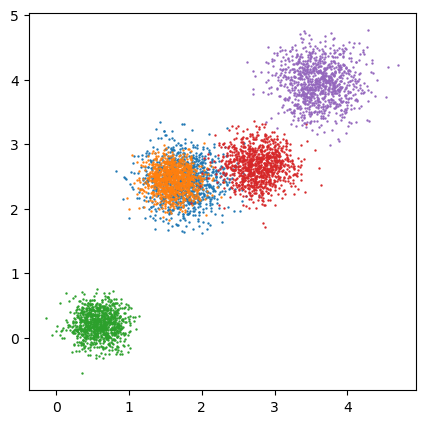

In [153]:
f, ax = plt.subplots(figsize=(5, 5), dpi=100)
for i in range(n_clusters):
    ax.scatter(*cluster_points[i], s=.5)

## Joining and shuffling all cluster points

To test SPIN reorder ability lets put all points in random order.

In [154]:
points = np.concatenate(cluster_points, axis=1)
index = [i for i in range(points.shape[1])]
np.random.shuffle(index)
points = points[:, index]

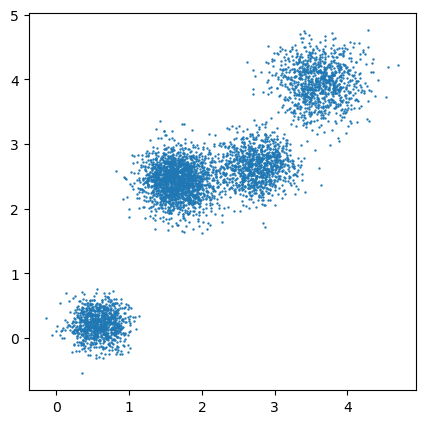

In [155]:
f, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.scatter(*points, s=0.5)

## Distances

In [156]:
distances = l2_distance_matrix(points, points)

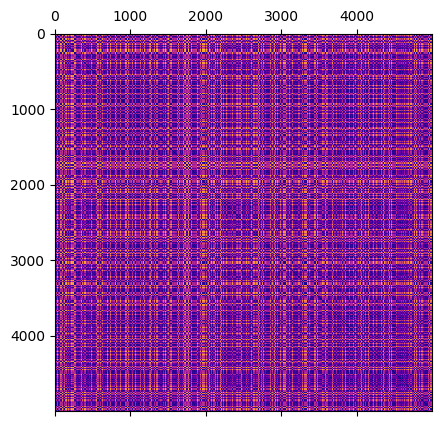

In [157]:
f, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.matshow(distances, cmap="plasma")

## Side to side SPIN 

In [158]:
%%time
n_points = points.shape[1]
incr_vector = np.array([i-(n_points+1)/2 for i in range(n_points)])

CPU times: user 1.01 ms, sys: 55 µs, total: 1.06 ms
Wall time: 1.07 ms


In [164]:
sts_spin = SideToSideSPIN(random_starts=5, max_iter=100000, verbose=True)

In [165]:
sts_spin.run(distances)

Setup
[[ 6252500.25  6249999.75  6247499.25 ... -6242498.25 -6244998.75
  -6247499.25]
 [ 6249999.75  6247500.25  6245000.75 ... -6240001.75 -6242501.25
  -6245000.75]
 [ 6247499.25  6245000.75  6242502.25 ... -6237505.25 -6240003.75
  -6242502.25]
 ...
 [-6242498.25 -6240001.75 -6237505.25 ...  6232512.25  6235008.75
   6237505.25]
 [-6244998.75 -6242501.25 -6240003.75 ...  6235008.75  6237506.25
   6240003.75]
 [-6247499.25 -6245000.75 -6242502.25 ...  6237505.25  6240003.75
   6242502.25]]
Initial energy: -15611435943.979645
Actual spin
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
..0: -39814035833285.33
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
..1: -39814035833285.33
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
..2: -39814035833285.33
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
..3: -398140358332

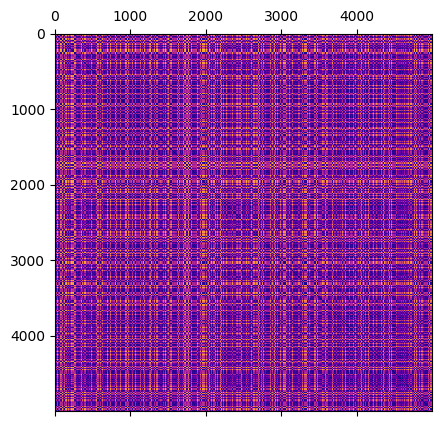

In [166]:
f, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.matshow(sts_spin.distances_, cmap="plasma")

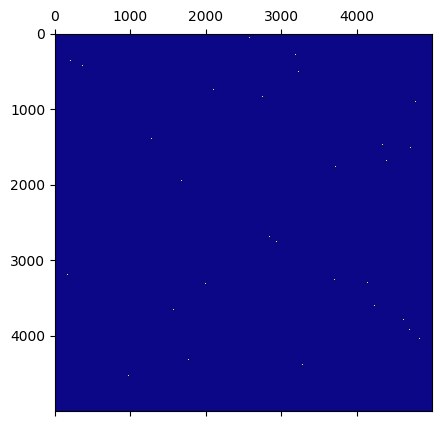

In [167]:
f, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.matshow(sts_spin.permutation_, cmap="plasma")

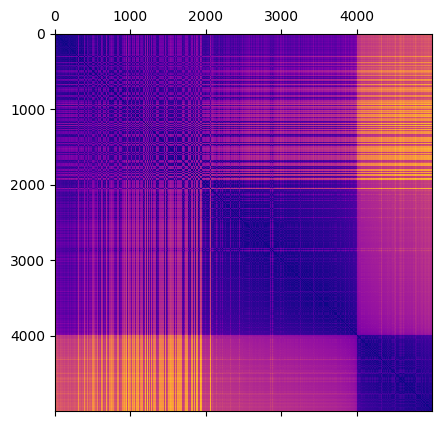

In [168]:
f, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.matshow(sts_spin.ordered_distances_, cmap="plasma")

## Neighborhood SPIN

In [15]:
%%time
n_points = points.shape[1]

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


In [34]:
sts_spin = SPIN(method='neighborhood', verbose=True, max_iter=100)

In [35]:
sts_spin.run(distances)

[[1.00000000e+00 9.99998000e-01 9.99992000e-01 ... 2.04798021e-22
  2.00744756e-22 1.96770924e-22]
 [9.99998000e-01 1.00000000e+00 9.99998000e-01 ... 2.08932291e-22
  2.04798021e-22 2.00744756e-22]
 [9.99992000e-01 9.99998000e-01 1.00000000e+00 ... 2.13149166e-22
  2.08932291e-22 2.04798021e-22]
 ...
 [2.04798021e-22 2.08932291e-22 2.13149166e-22 ... 1.00000000e+00
  9.99998000e-01 9.99992000e-01]
 [2.00744756e-22 2.04798021e-22 2.08932291e-22 ... 9.99998000e-01
  1.00000000e+00 9.99998000e-01]
 [1.96770924e-22 2.00744756e-22 2.04798021e-22 ... 9.99992000e-01
  9.99998000e-01 1.00000000e+00]]
.....................
iter=0 ....................................

KeyboardInterrupt: 

In [ ]:
f, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.matshow(sts_spin.ordered_distances_, cmap="plasma")

In [ ]:
f, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.matshow(sts_spin.permutation_, cmap="plasma")